# Calculate the geo-spatial mean

Note that this functionality only works on `xarray.DataArray`.

In [1]:
%load_ext autoreload
%autoreload 2

import os
os.chdir('/glade/u/home/fengzhu/Github/x4c/docsrc/notebooks')
import x4c
print(x4c.__version__)

2024.4.13


## ATM

In [2]:
dirpath = '/glade/campaign/univ/ubrn0018/fengzhu/CESM_output/timeseries/b.e13.B1850C5.ne16_g16.icesm131_d18O_fixer.Miocene.3xCO2.005/atm/proc/tseries/month_1'
fname = 'b.e13.B1850C5.ne16_g16.icesm131_d18O_fixer.Miocene.3xCO2.005.cam.h0.TS.695101-700012.nc'
ds = x4c.load_dataset(os.path.join(dirpath, fname), comp='atm', grid='ne16', adjust_month=True)
ds

<xarray.Dataset> Size: 34MB
Dimensions:       (lev: 30, ilev: 31, ncol: 13826, time: 600, nbnd: 2)
Coordinates:
  * lev           (lev) float64 240B 3.643 7.595 14.36 ... 957.5 976.3 992.6
  * ilev          (ilev) float64 248B 2.255 5.032 10.16 ... 967.5 985.1 1e+03
  * time          (time) object 5kB 6951-01-31 00:00:00 ... 7000-12-31 00:00:00
Dimensions without coordinates: ncol, nbnd
Data variables: (12/32)
    hyam          (lev) float64 240B 0.003643 0.007595 0.01436 ... 0.001989 0.0
    hybm          (lev) float64 240B 0.0 0.0 0.0 0.0 ... 0.9512 0.9743 0.9926
    P0            float64 8B 1e+05
    hyai          (ilev) float64 248B 0.002255 0.005032 0.01016 ... 0.0 0.0
    hybi          (ilev) float64 248B 0.0 0.0 0.0 0.0 ... 0.9636 0.9851 1.0
    lat           (ncol) float64 111kB -35.26 -35.98 -37.07 ... 37.91 36.74
    ...            ...
    f11vmr        (time) float64 5kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    f12vmr        (time) float64 5kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0 0.0
    sol_tsi       (time) float64 5kB -1.0 -1.0 -1.0 -1.0 ... -1.0 -1.0 -1.0 -1.0
    nsteph        (time) int32 2kB 121765488 121766832 ... 122638512 122640000
    TS            (time, ncol) float32 33MB 303.3 302.6 301.7 ... 293.7 294.3
    gw            (ncol) float64 111kB 0.0001546 0.000515 ... 0.00129 0.001289
Attributes: (12/14)
    np:               4
    ne:               16
    Conventions:      CF-1.0
    source:           /glade/campaign/univ/ubrn0018/fengzhu/CESM_output/times...
    case:             b.e13.B1850C5.ne16_g16.icesm131_d18O_fixer.Miocene.3xCO...
    title:            UNSET
    ...               ...
    Version:          $Name$
    revision_Id:      $Id$
    initial_file:     /glade/work/fengzhu/Projects/Miocene-on-Derecho/04.atm-...
    topography_file:  /glade/work/fengzhu/Projects/Miocene-on-Derecho/04.atm-...
    comp:             atm
    grid:             ne16

### Global/NH/SH Mean

Note that we can use `ds.x[vn]` to inherit the grid weight and other information from `ds`.

In [3]:
da = ds.x['TS']
da

<xarray.DataArray 'TS' (time: 600, ncol: 13826)> Size: 33MB
array([[303.2653 , 302.64194, 301.74304, ..., 293.40912, 290.49326,
        291.51266],
       [304.96698, 304.47775, 303.6411 , ..., 292.55505, 290.78116,
        291.5703 ],
       [304.07266, 303.58566, 302.72723, ..., 292.32098, 290.56488,
        291.47375],
       ...,
       [298.09906, 297.05795, 295.8722 , ..., 302.9543 , 300.95343,
        301.71008],
       [299.26538, 298.24268, 296.901  , ..., 299.05908, 296.66257,
        297.3848 ],
       [302.0511 , 301.19028, 299.91696, ..., 296.0614 , 293.69016,
        294.33484]], dtype=float32)
Coordinates:
  * time     (time) object 5kB 6951-01-31 00:00:00 ... 7000-12-31 00:00:00
Dimensions without coordinates: ncol
Attributes:
    units:         K
    long_name:     Surface temperature (radiative)
    cell_methods:  time: mean
    source:        /glade/campaign/univ/ubrn0018/fengzhu/CESM_output/timeseri...
    gw:            <xarray.DataArray 'gw' (ncol: 13826)> Size: 111kB\narray([...
    lat:           <xarray.DataArray 'lat' (ncol: 13826)> Size: 111kB\narray(...
    lon:           <xarray.DataArray 'lon' (ncol: 13826)> Size: 111kB\narray(...

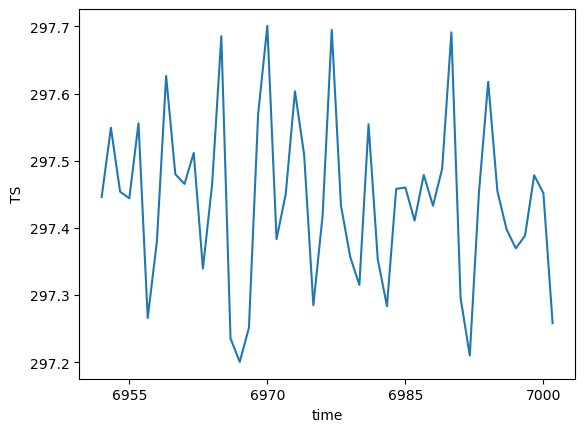

In [7]:
da_gm = da.x.gm()
da_gm.x.annualize().plot()

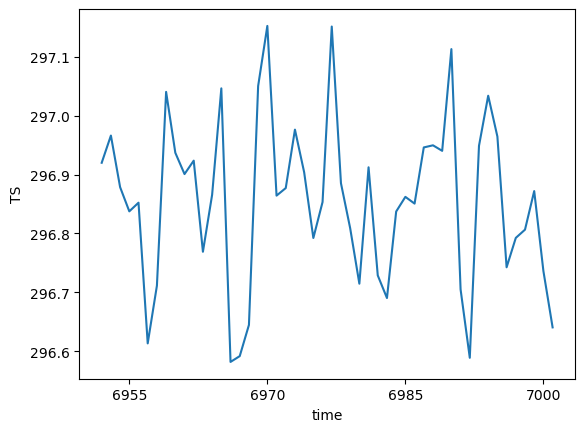

In [8]:
da_nhm = da.x.nhm()
da_nhm.x.annualize().plot()

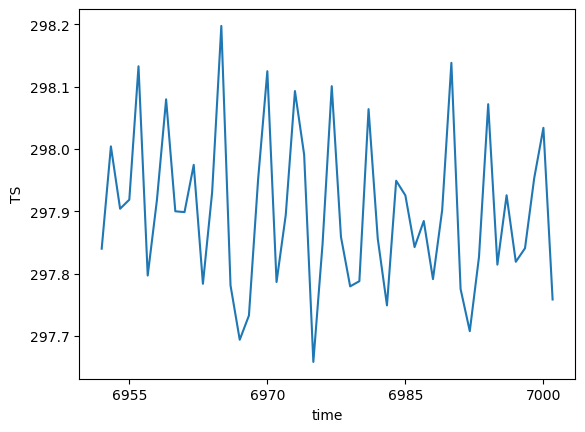

In [10]:
da_shm = da.x.shm()
da_shm.x.annualize().plot()

### Arbitrary lat/lon range

In [6]:
ds_rgd = ds.x.regrid(dlon=1, dlat=1)

Regridding from [1, 13826] to [180, 360]


In [14]:
dam = ds_rgd['TS'].x.geo_mean()
dam

<xarray.DataArray 'TS' (time: 600)> Size: 5kB
array([295.98268699, 296.53745626, 296.88841472, 297.36391282,
       297.84475026, 298.57858628, 299.01457677, 299.0325016 ,
       298.39311675, 297.340192  , 296.38504893, 295.98865142,
       296.31487849, 296.96610352, 297.33457104, 297.60034202,
       298.02721971, 298.57619693, 299.01248295, 298.89591675,
       298.24485774, 297.31243932, 296.32462747, 295.97777113,
       296.06486197, 296.68796519, 297.22452041, 297.50629987,
       297.90931544, 298.50193453, 298.94964659, 298.86933386,
       298.21092202, 297.24800993, 296.30409568, 295.96643816,
       295.91120313, 296.37847939, 296.9866578 , 297.45011021,
       298.03906909, 298.59803267, 299.03896385, 298.92384912,
       298.27730092, 297.33315636, 296.38553468, 296.00338331,
       296.28729965, 296.82015653, 297.46666847, 297.63616992,
       298.1158605 , 298.60175042, 299.01178227, 298.98261426,
       298.21678047, 297.25691663, 296.34673051, 295.92427951,
       296.07714247, 296.22547309, 296.92200798, 297.43420196,
       297.76838197, 298.3106654 , 298.75611767, 298.69365433,
       298.03049491, 297.10624859, 296.11828222, 295.74341892,
       295.87477021, 296.37777003, 297.07600526, 297.28374413,
       297.80184721, 298.41447555, 298.92422442, 298.86827991,
...
       298.03485182, 298.49160518, 299.00064083, 298.90013405,
       298.17300606, 297.24189217, 296.35076572, 295.87812972,
       296.30636749, 296.72531992, 297.15939221, 297.4685589 ,
       297.8945415 , 298.57821116, 298.99889531, 298.82609064,
       298.01267297, 297.00081416, 296.18983621, 295.60752683,
       295.91391955, 296.55358682, 296.97554378, 297.34396771,
       297.67667935, 298.30286874, 298.9128744 , 298.87266972,
       298.24023761, 297.2918287 , 296.47087476, 295.87782633,
       296.10680084, 296.78642741, 297.13117812, 297.47201543,
       297.82257331, 298.393911  , 298.86984849, 298.76449297,
       298.11420579, 297.14858586, 296.09055737, 295.95541143,
       296.30267452, 296.55486491, 296.9552591 , 297.40299345,
       297.90086151, 298.55146436, 298.96070772, 298.89058293,
       298.30401717, 297.35857182, 296.47062157, 296.08391577,
       296.11456792, 296.72949889, 297.19571448, 297.60641414,
       297.91535614, 298.53675428, 298.91965309, 298.91955488,
       298.28405593, 297.23298417, 296.23538401, 295.72570713,
       295.88395315, 296.39448639, 296.92093292, 297.39835124,
       297.86852863, 298.39411066, 298.78391159, 298.73583216,
       298.0412503 , 297.0493124 , 296.05442569, 295.56976798])
Coordinates:
  * time     (time) object 5kB 6951-01-31 00:00:00 ... 7000-12-31 00:00:00

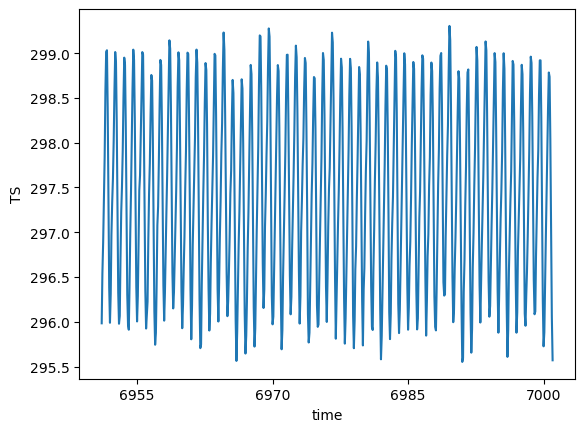

In [15]:
dam.plot()

We may also quickly get climate indices.
Supported indices: "nino3.4", "nino1+2", "nino3", "nino4", "wpi", "tpi", "dmi", "iobw".

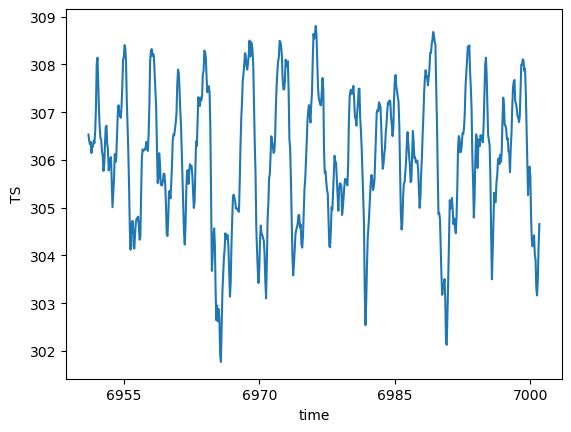

[WARNING] yaksa: 10 leaked handle pool objects


In [16]:
dam = ds_rgd['TS'].x.geo_mean(ind='nino3.4')
dam.plot()

## Zonal mean

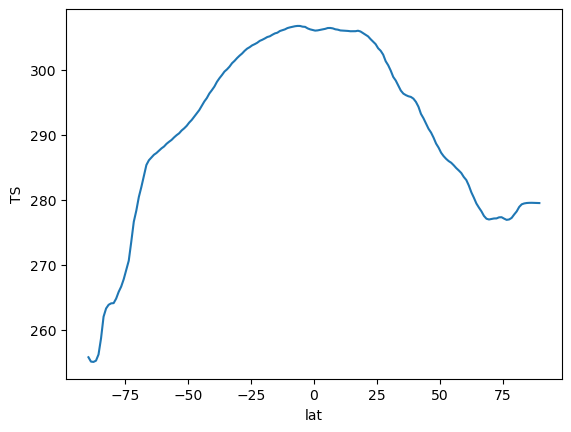

In [10]:
da_zm = ds_rgd['TS'].x.annualize().x.zm()
da_zm.plot()